In [1]:
#Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Diabetes Prediction on Pima Indians Diabetes Database using Naive Bayes

Data Set Link - https://www.kaggle.com/uciml/pima-indians-diabetes-database
The Pima Indian Diabetes Database is from National Institute of Diabetes and Digestive and Kidney Diseases. It consists of nine variables, out of which 'outcome' is the target variable. The objective of this dataset is to aid in predicting if a person is likely to have Diabetes or not.

Data Desription 

Predictor Variables

1. Preganancies - Number of times the patient got pregnant 
2. Glucose - Plasma glucose concentration 
3. Blood Preassure - Diastolic Blood Preassure (mmHg)
4. Skin Thickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [2]:
# importing all the necessary packages 
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Loading the data set 
data=pd.read_csv('./diabetes.csv')

In [8]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
# Lets check the dimension of the data set 
data.shape

(768, 9)

In [11]:
# Printing the first 5 records of the data set 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Missing Value Detection and Treatment 

The following values in a data set are considered to be missing values - 

1. Blank Values 
2. NaN 
3. null 
4. Some countinuous columns might have 0's to indicate missing data. 

In [12]:
# Lets start by checking the count of records in each column of the data set. 
# If the count of records is lesser than the total number of records i.e. 768, we can conclude that there 
# are blank records. 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The count of records for all the columns is 768, this indicates that there are no blank columns in the data set. 

In [13]:
# Since all the predictor columns are continuous in nature, there might be a chance that 0's 
#in these columns indicate missing data. 

# Lets check the above claim.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description of the data, we can see that columns - 
Pregnancies, Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have minimum values of 0. 
It makes sense to have 0 prgnancies, but the it does not make sense for other mentioned variables to have a minimum value of 0.
So we can conclude that Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data. 
The 0's in these columns should be replaced with the median, since the median is least affected by outliers. 

In [14]:
# Replacing the 0's with NaN.
# The records that have 0's in columns Glucose, Blood Preassure, Skin Thickness, Insulin and BMI will be replaced with NaN 
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)


In [15]:
#Lets check if the above code has worked 
data.head()
# All the 0's have been replaced by NaN

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
# data.head().isnull().su
data.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
# Count of NaN values in the dataset 
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As inferred columns glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data. 
Glucose, Blood Preassure and BMI have less number of missing data but skin thickness and Insulin have a very high amount of missing data. 
Removing these missing data from the data set will result in information loss and it is not advisable to remove thse records since we have only 768 records. 
Hence we will impute these missing values with the median of their respective columns, since median is the least affected by outliers. 

In [21]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [22]:
# Imputing missing values with their respective columns median
data.fillna(data.median(), inplace=True)

In [23]:
# Checking if the missing values have been imputed 
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Outlier Detection and treatment

Outlier Detection 

Boxplots are a great way of detecting outliers. 
Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

<Axes: ylabel='Age'>

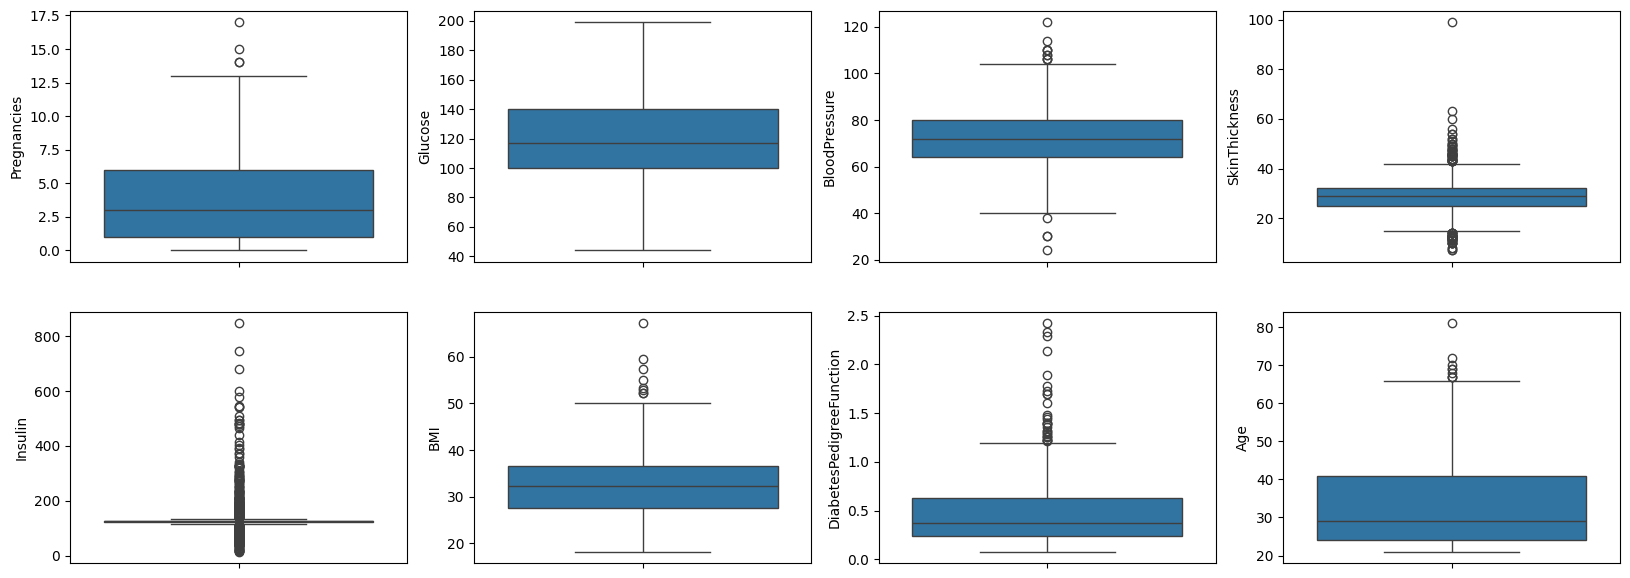

In [24]:
# Outlier detection using boxplots 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

Apart from 'Glucose' all the other attributes show preasence of outliers. 
These lower level and upper level outliers will be replaced by the 5th and 95th percentile respectively.

In [25]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05), upper=data['Pregnancies'].quantile(0.95))
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05), upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05), upper=data['SkinThickness'].quantile(0.95))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper=data['Insulin'].quantile(0.95))
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05), upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05), upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05), upper=data['Age'].quantile(0.95))

<Axes: ylabel='Age'>

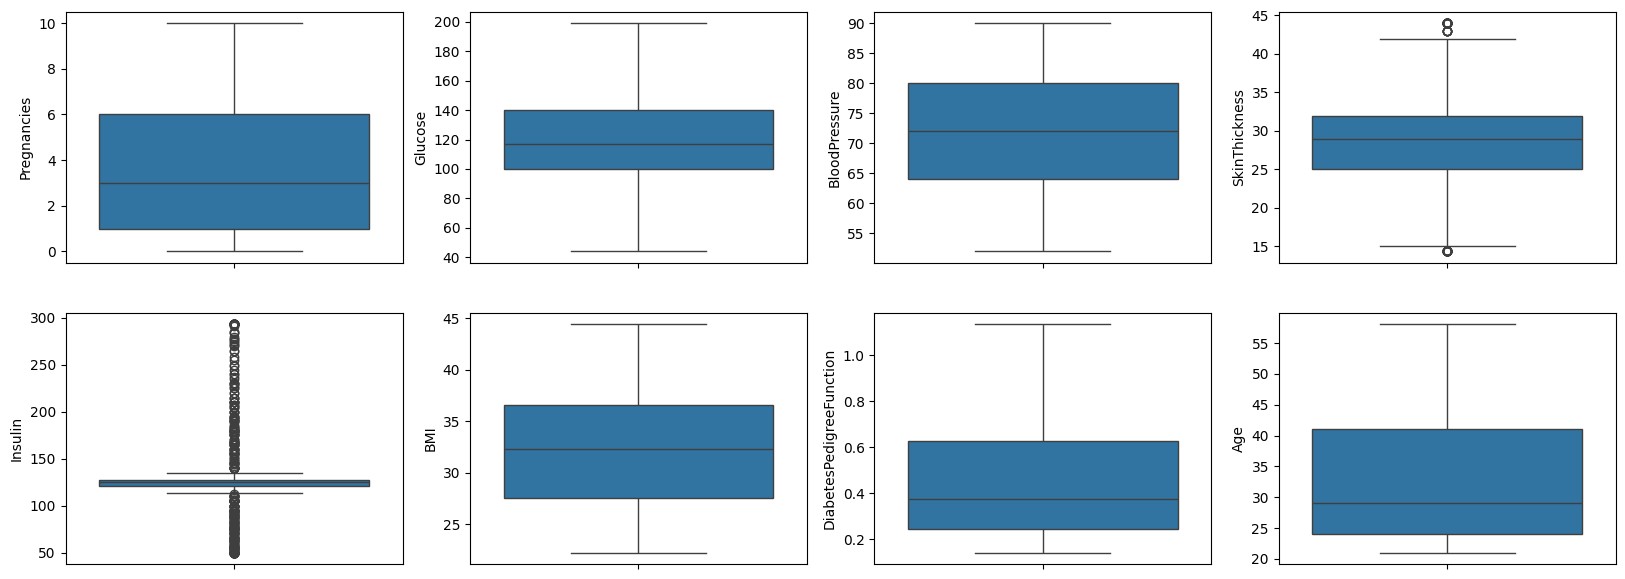

In [26]:
# Lets visualise the boxplots after imputing the outliers 
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

<Axes: ylabel='Insulin'>

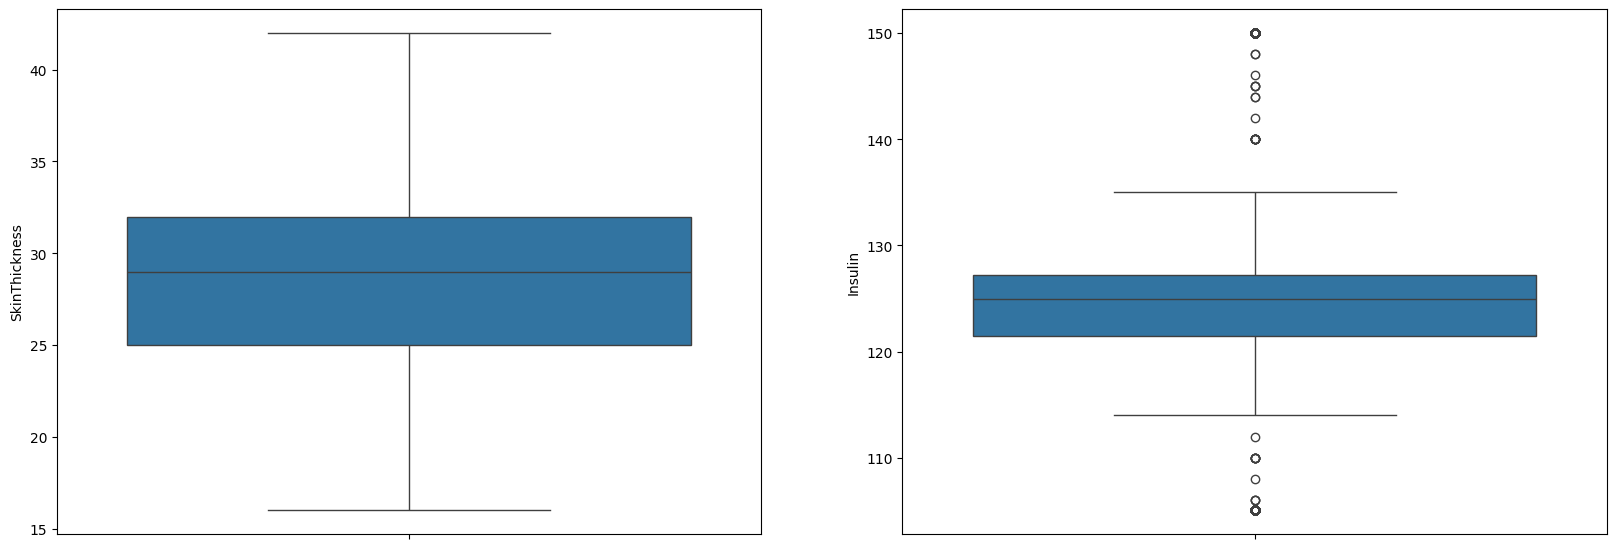

In [27]:
# As we can see, there are still outliers in columns Skin Thickness and Insulin. Lets try manipulating the percentile values.
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.07), upper=data['SkinThickness'].quantile(0.93))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.21), upper=data['Insulin'].quantile(0.80))
plt.figure(figsize= (20,15))
plt.subplot(2,2,1)
sns.boxplot(data['SkinThickness'])
plt.subplot(2,2,2)
sns.boxplot(data['Insulin'])

The outliers of Skin Thickness were treated by minor changes in the percentiles but the outliers of insulin require a major changes in the percentiles. This might result in too much data manipulation, which migh jepordise the models.

Attribute Insulin might have to be removed from the data set.

#  Data Visualisation

<Axes: ylabel='count'>

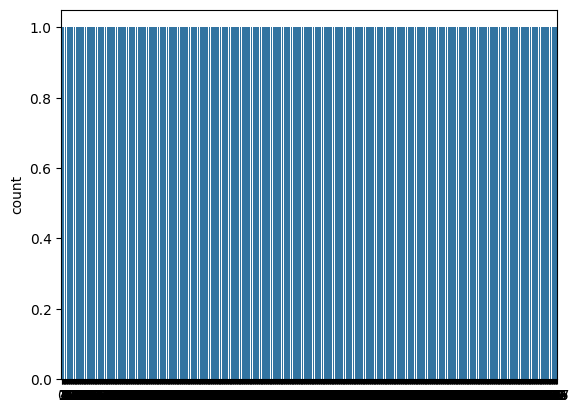

In [28]:
# Lets start by understanding the distribution diabitic Vs Non Diabitic patients in the data set.

sns.countplot(data['Outcome'])

From the above plot we can infer that majority of the data consists of Non Diabetic Patients. 
Lets try to understand the percentage distribution of Diabetic Vs Non Diabetic in the data set. 

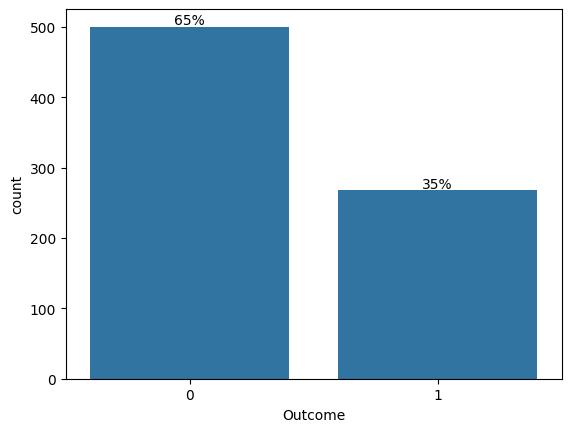

In [29]:
total=float(len(data))
ax = sns.countplot(x="Outcome", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 

About 65% of the data contains records belonging to Non Diabetic Patients. 
The data set has a class imbalance and might have to be treated in future, during the model building stages.

Lets now plot a corr-plot (correlation plot). This plot will help us understand if there is multi colinearity in the data set.

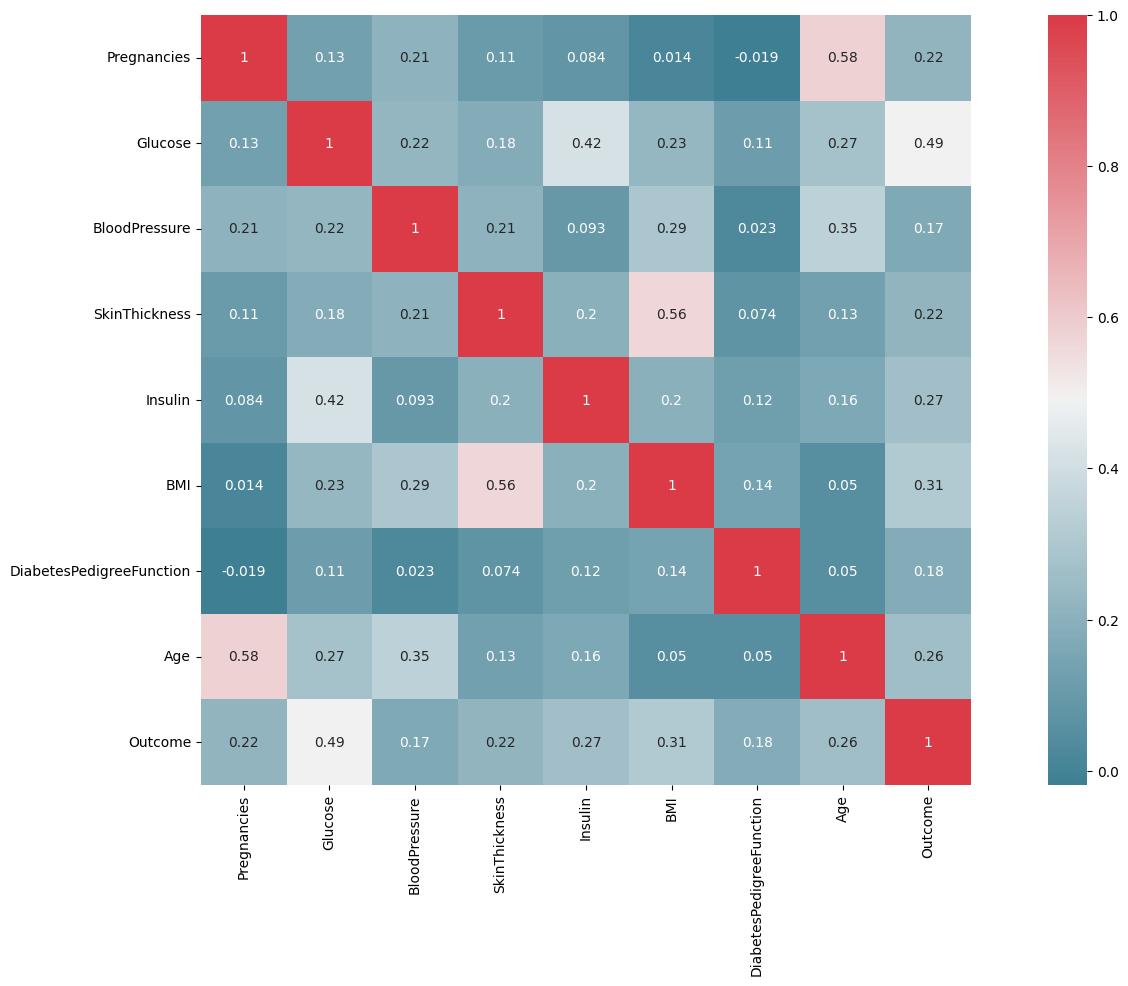

In [32]:
# f, ax = plt.subplots(figsize=(20, 10))
# corr = data.corr("pearson")
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax,annot=True)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()


From the above corr-plot, it can be inffered that there is no high multi-colinearity in the data set.

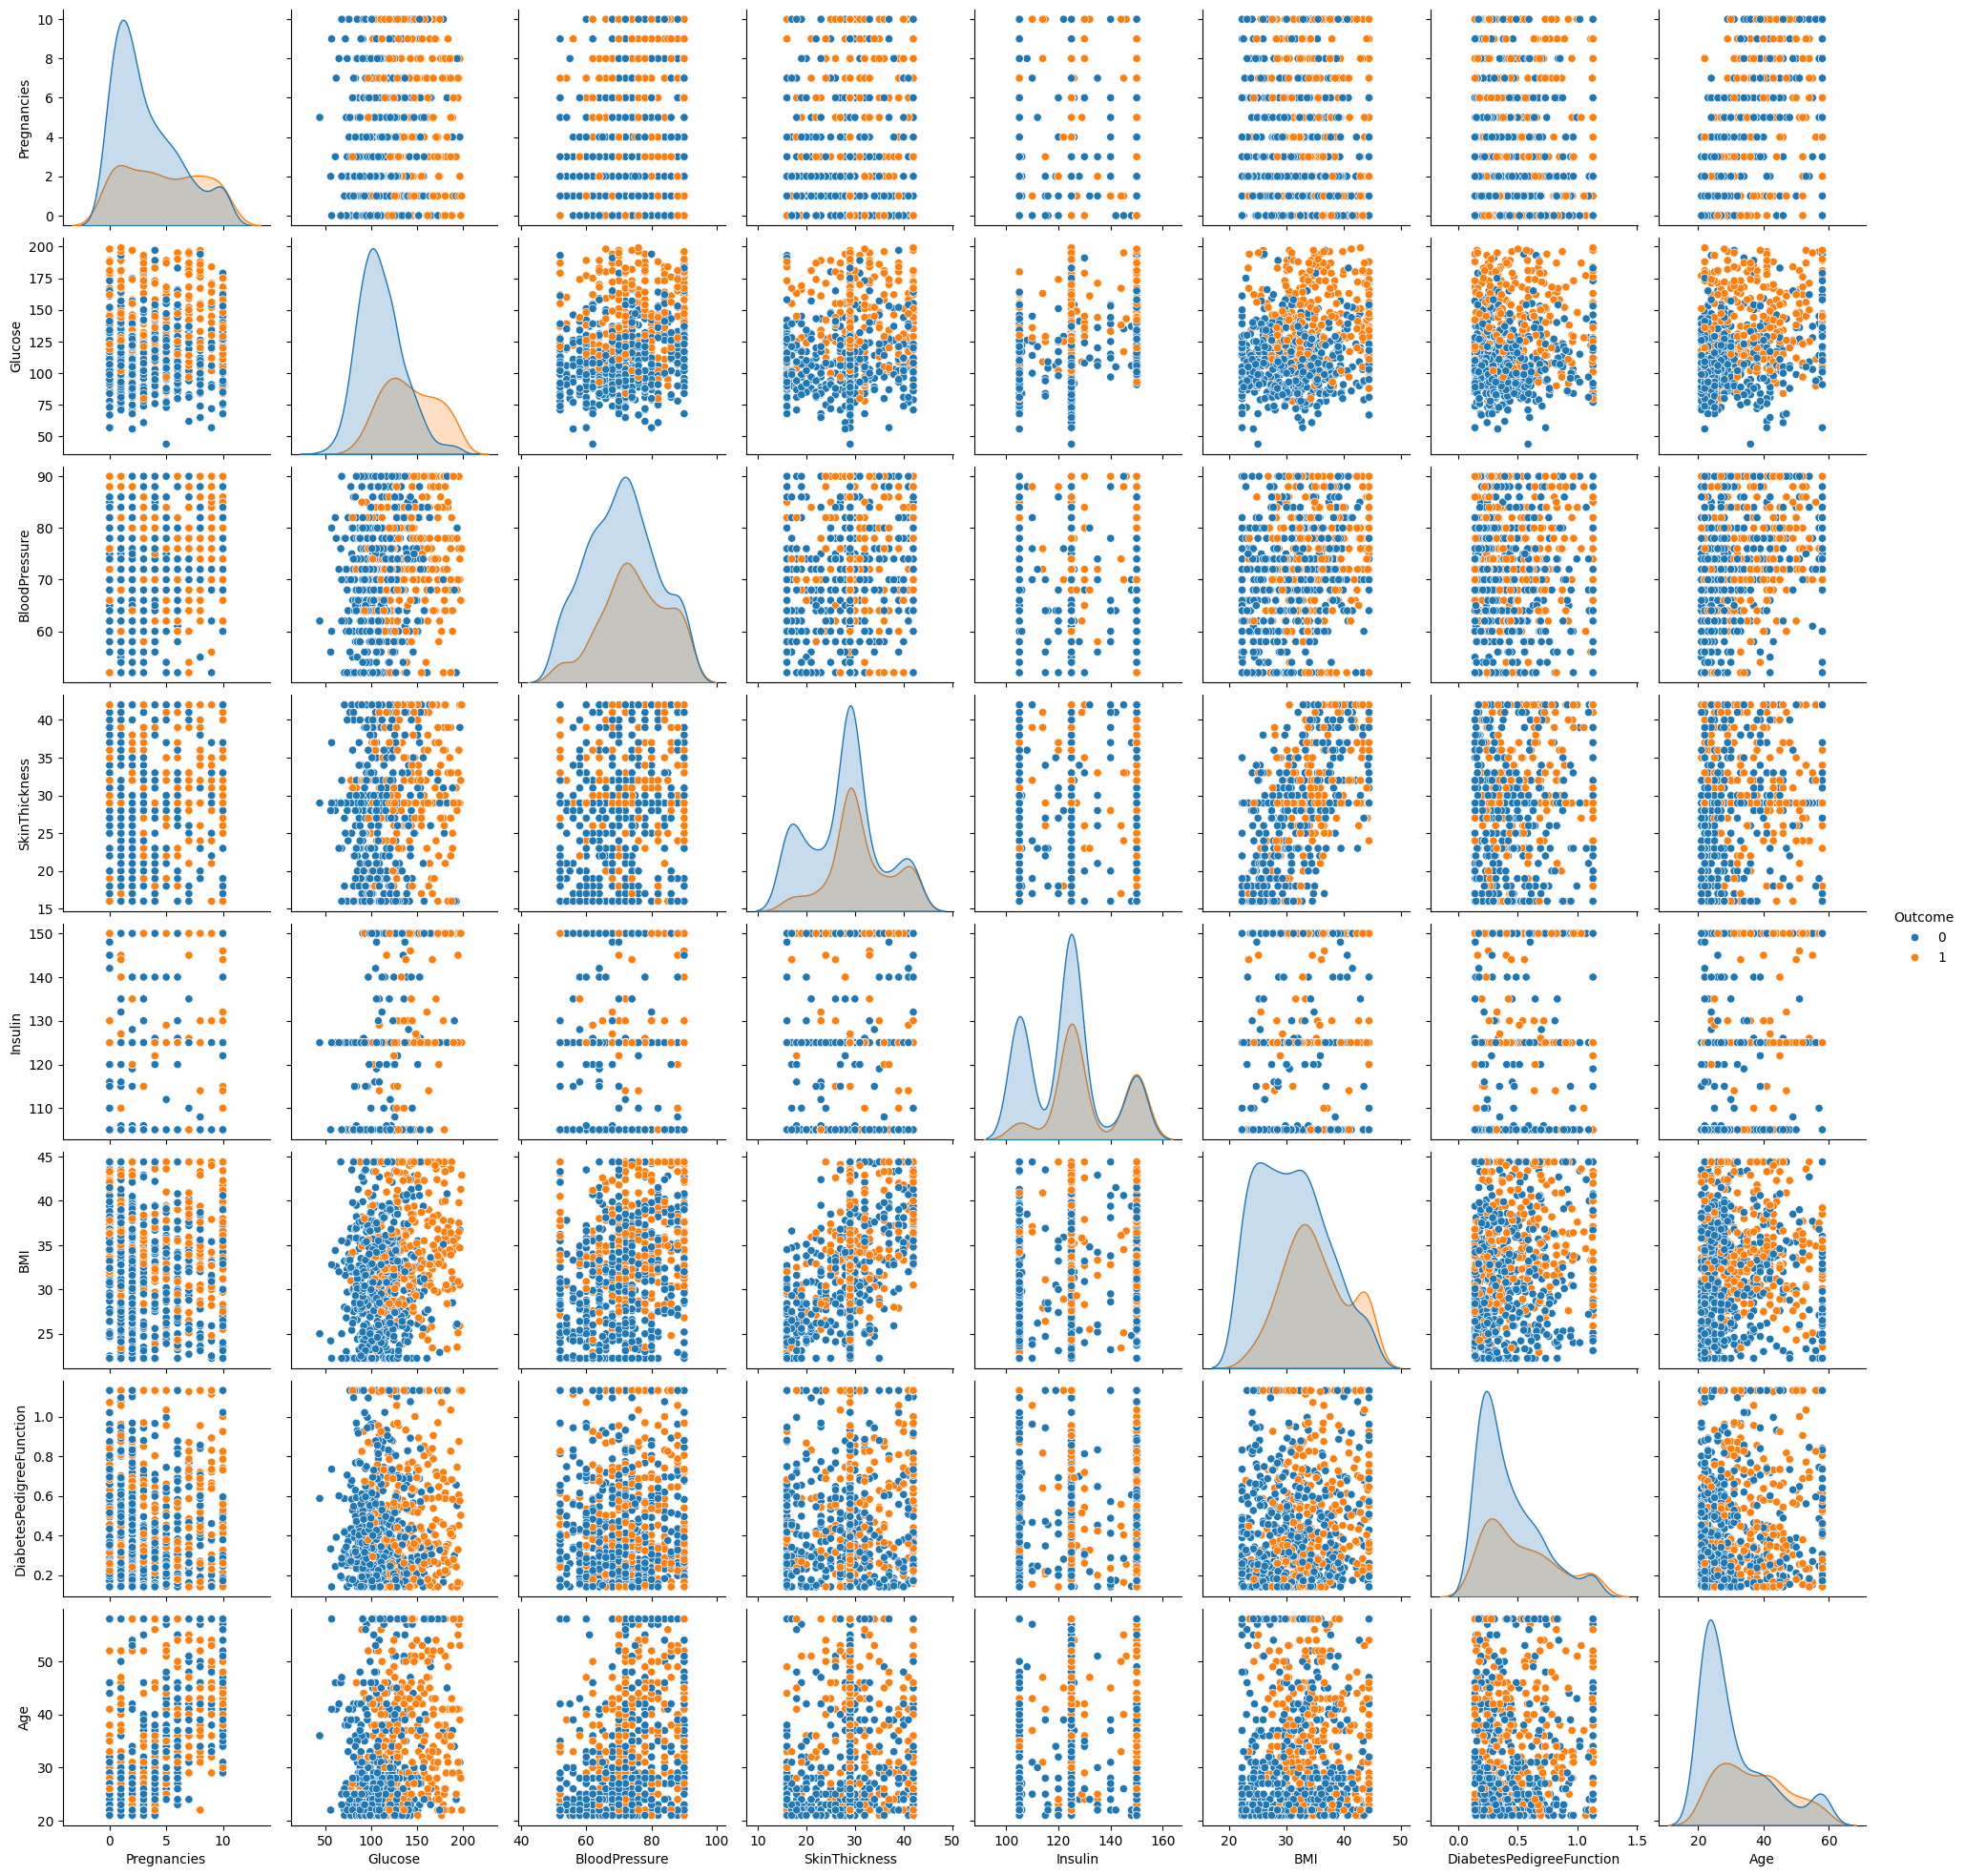

In [33]:
# Pair plot analysis 
sns.pairplot(data,hue='Outcome',diag_kind='kde')

From the above pairplot, we can infer that most of the predictor variables are weak predictors of Outcome. The kernal density plots (diagonal) suggests that the distribution for diabetic and non diabetic are very similar and are overlapping each other significantly, hence they wont be able to differentiate between a diabetic patient and a non diabetic patient. 

The scatterplots also suggest very poorly corelated data (data with not hidden patterns or relationships). Hence models built on this data might not be able to identify any hidden patterns or might identify nonsense patterns i.e. patterns that do not make sense.

In [34]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
x= data.drop(['Outcome'],axis =1)
y=data['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [36]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [37]:
model.fit(xTrain,yTrain)

GaussianNB()

In [38]:
predicted= model.predict(xTest)

In [39]:
print("Predicted Value:", predicted)

Predicted Value: [1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [40]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, predicted))

Accuracy: 0.7792207792207793
